In [1]:
from pulse_animation import *
%config InlineBackend.figure_format = 'retina'

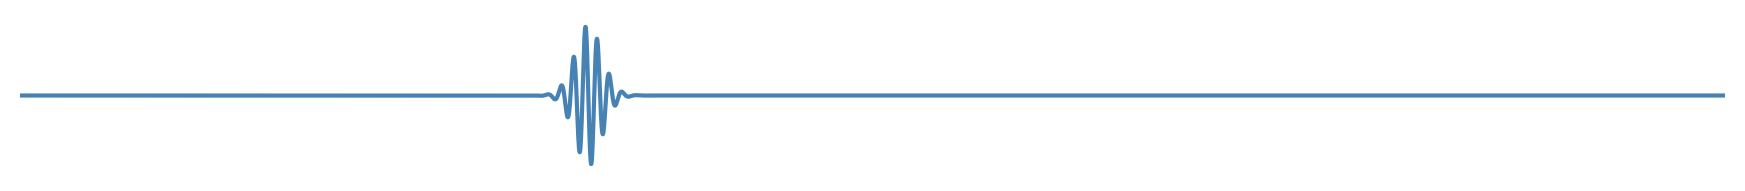

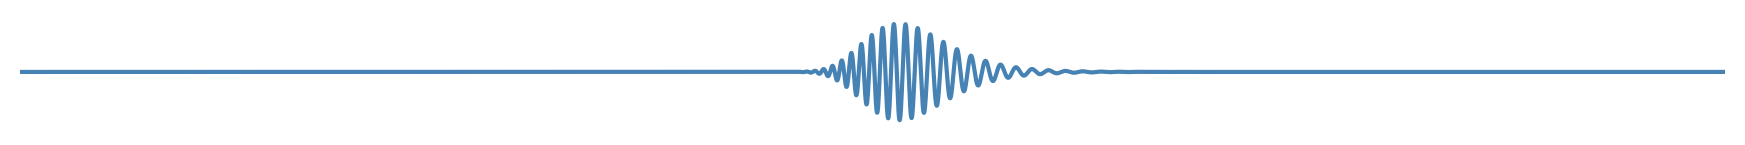

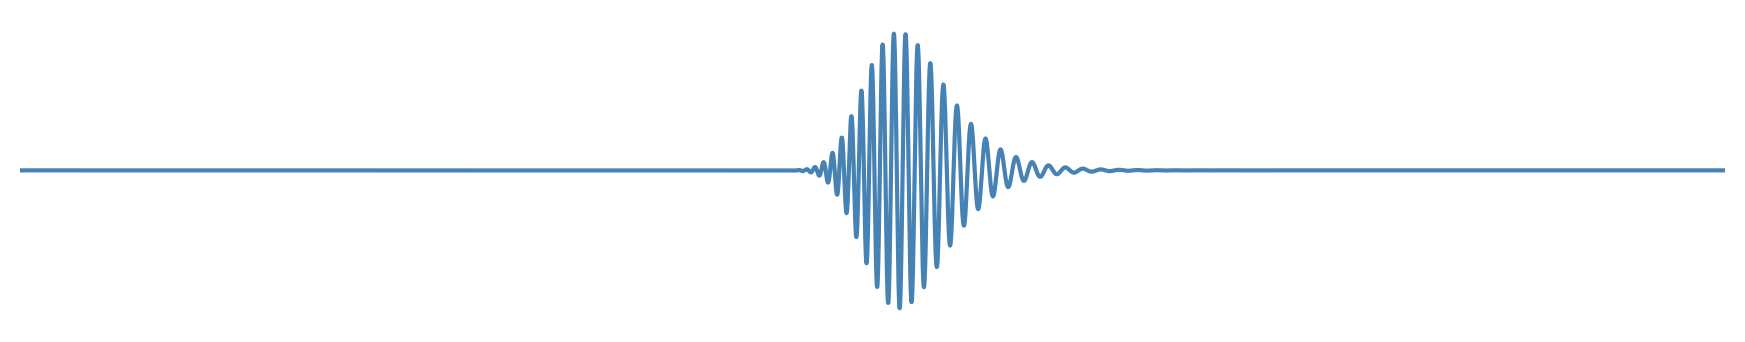

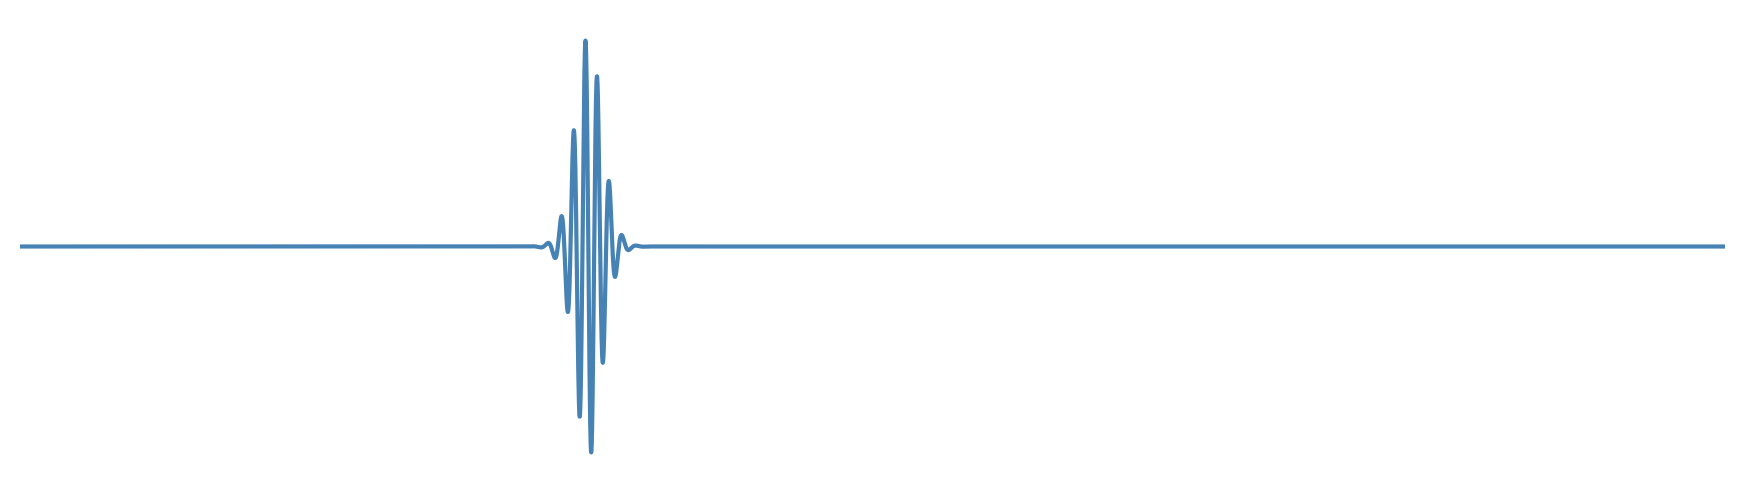

In [2]:
z = np.linspace(-300, 600, 10000)
times = [0, 500, 500, 0]
scales = [1, 0.7, 2, 3]
for i in range(len(times)):
    plot_pulses(z, [times[i]], nu_center=0.15, k_i=[1, 3, 4], spec_width=100,
                no_axes=True, plotname="./plots/setup/pulses_"+str(i+1), 
                figuresize=(11,scales[i]))

# Frequency chirped pulse

By making the index of refraction frequency dependent, the shape of the pulse changes over time as it propagates through an optical fiber. The leading edge of the pulse gets red shifted, i.e. the instantaneous frequency becomes smaller while the trailing edge is blue shifted, i.e. the instantaneous frequency becomes larger.

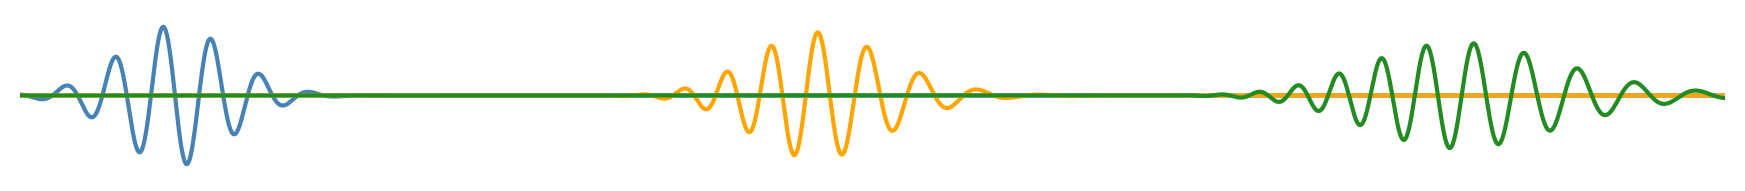

In [3]:
z = np.linspace(-20, 200, 10000)
# +z_max=100 - nice settings to get three good pulses with stretching
plot_pulses(z, np.linspace(0, 500, 3), nu_center=0.15, k_i=[1, 3, 2], no_axes=True, 
            plotname="./plots/chirped_pulses/pulses", figuresize=(11,1),
            colors=["steelblue", "orange", "forestgreen"], spec_width=100)

# Spectral components of the pulse

The pulse can be decomposed to its spectral components, i.e. plane waves of different wavelengths. The pulse itself is the sum of all the spectral components. The plots below show the resulting pulse, the corresponding spectral components (due to reasons of visibility, only a few of them with large amplitude are shown) as well as the underlying frequency spectrum.

plotted 20 frequencies


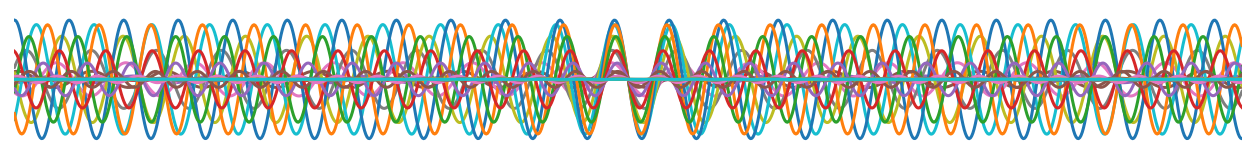

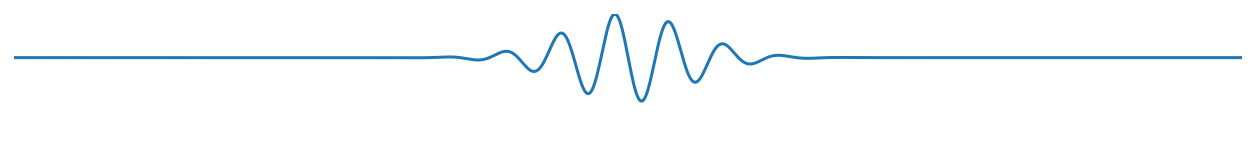

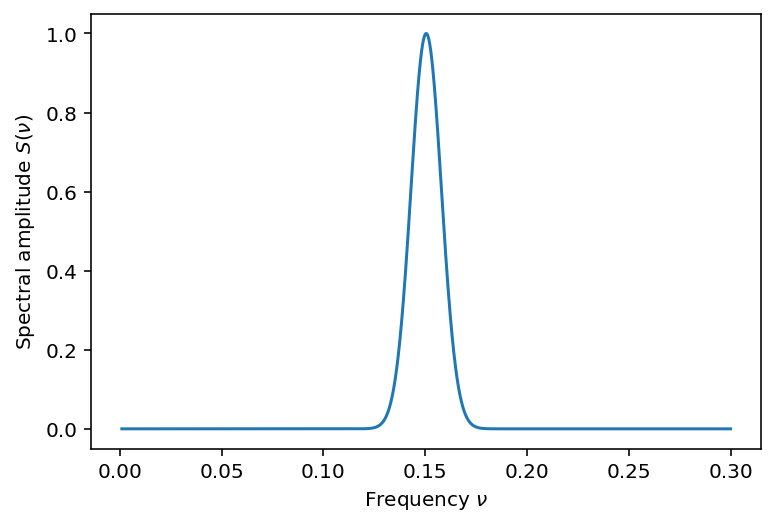

In [4]:
z = np.linspace(-70, 70, 1000)
d = sin_sum(z, 0, N_frequencies=4000, nu_center=0.15, k_i=(1, 3, 2), spec_width=100,
            plotting=True, figuresize=(11,1.2), savein="./plots/sum_demonstration")

# Group delay

If the index of refraction does not depend on the frequency/wavelength, the pulse just propagates along the $z$-axis.

In [22]:
z = np.linspace(0, 100, 3000)
p = calc_pulses(z, t_start=0, t_end=1000, n_steps=200, nu_center=0.025, k_i=[4, 10, 0], spec_width=600)
animate(z, p, ms_between_frames=40, figuresize=(14, 4), saveas="./animations/group_delay.gif")

100%|██████████| 200/200 [00:39<00:00,  5.01it/s]


## Group velocity dispersion

By introducing $\frac{d^2k}{d\omega^2} \neq 0$, the pulse disperses. This results in a linear frequency of the pulse.

In [1]:
from pulse_animation import *
%config InlineBackend.figure_format = 'retina'

In [19]:
z = np.linspace(-30, 600, 1000)
p = calc_pulses(z, t_start=0, t_end=2500, n_steps=600, nu_center=0.02, k_i=[1, 3, 2], spec_width=600)
animate(z, p, ms_between_frames=40, figuresize=(14, 4), saveas="./animations/group_velocity_dispersion.gif")

100%|██████████| 600/600 [00:58<00:00, 10.22it/s]


## Third order dispersion

By introducing $\frac{d^3k}{d\omega^3} \neq 0$, the pulse also disperses. This results in a quadratic frequency of the pulse.

## Group velocity = phase velocity

This is the case if $n(\omega) = n$, which means that the refractive index does not depend on the (vacuum) wavelength. In term of the wave vector $k(\omega)$, this means

\begin{align}
    k(\omega) = \frac{2 \pi n(\omega)}{\lambda_0} = \frac{2 \pi n}{c_0 / \nu} = \frac{\omega n}{c_0} \propto \omega
\end{align}

In case of the implementation in the code here, where $k(\omega)$ is written as a taylor expansion around $\omega_0$, this means

\begin{align}
    k(\omega) = a \omega \overset{!}{=} k_0 + k_1 \cdot (\omega - \omega_0)
\end{align}

\begin{align}
    \rightarrow k_0 = k_1 ~ \omega_0 ~~~ \text{and} ~~~ a=k_1
\end{align}

In [24]:
z = np.linspace(0, 200, 3000)
p = calc_pulses(z, t_start=0, t_end=2000, n_steps=200, nu_center=0.02, k_i=[10*2*np.pi*0.02, 10, 0], spec_width=600)
animate(z, p, ms_between_frames=40, figuresize=(14, 4), saveas="./animations/group_equal_phase.gif")

100%|██████████| 200/200 [00:39<00:00,  5.11it/s]
